<a href="https://www.kaggle.com/hasanmahmood516/ames-iowa-housing?scriptVersionId=86430800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_file_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
train = pd.read_csv(train_file_path)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.shape

(1460, 81)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
missing_values_count = train.isnull().sum()

for i in range(0, len(missing_values_count)):
    if missing_values_count[i]!=0:
        print(missing_values_count.index[i], missing_values_count[i])

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [8]:
#what proportion of cells are missing? 
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()
percentage_missing = 100*total_missing/total_cells
print(percentage_missing)

5.889565364451209


In [9]:
#First we'll remove the columns with almost all data missing...

train2 = train.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [10]:
#check successful update
train2.shape

(1460, 77)

In [11]:
missing_values_count2 = train2.isnull().sum()

for i in range(0, len(missing_values_count2)):
    if missing_values_count2[i]!=0:
        print(missing_values_count2.index[i], missing_values_count2[i])

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [12]:
#Let's have a look at some of these columns with missing values to see how we should deal with them. 
print(train2.LotFrontage)

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64


In [13]:
#From the documentation: LotFrontage: Linear feet of street connected to property. We'll just replace the missing values with the mean.
train2.LotFrontage = train2.LotFrontage.fillna(train2.LotFrontage.mean())

In [14]:
#Check it worked
train2.LotFrontage.isnull().sum()

0

In [15]:
"""
    Now let's look at the FireplaceQu column. From the documentation, we have: 
    FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Therefore, the missing values are probably because the house doesn't have a fireplace. However, we see that there is already
a value, NA, for missing fireplace, so it may be that the data for these cases was not put in correctly. Let's look closer
at these cases...
"""


"\n    Now let's look at the FireplaceQu column. From the documentation, we have: \n    FireplaceQu: Fireplace quality\n\n       Ex\tExcellent - Exceptional Masonry Fireplace\n       Gd\tGood - Masonry Fireplace in main level\n       TA\tAverage - Prefabricated Fireplace in main living area or Masonry Fireplace in basement\n       Fa\tFair - Prefabricated Fireplace in basement\n       Po\tPoor - Ben Franklin Stove\n       NA\tNo Fireplace\n\nTherefore, the missing values are probably because the house doesn't have a fireplace. However, we see that there is already\na value, NA, for missing fireplace, so it may be that the data for these cases was not put in correctly. Let's look closer\nat these cases...\n"

In [16]:
(train2.FireplaceQu == "NA").sum()

0

In [17]:
train2.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
#Let's replace all missing values with "NA":
train2.FireplaceQu = train2.FireplaceQu.fillna("NA")

In [19]:
train2.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
missing_values_count2 = train2.isnull().sum()

for i in range(0, len(missing_values_count2)):
    if missing_values_count2[i]!=0:
        print(missing_values_count2.index[i], missing_values_count2[i])

MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [21]:
train2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
#Let's deal with the rest of the missing values...

train2.MasVnrType.value_counts()

#Seems like the -1 values are recorded as missing for some reason, but don't actually seem to be any missing values here.

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
train2.MasVnrArea = train2.MasVnrArea.fillna(train2.MasVnrArea.mean()) #replace with mean

In [24]:
#For BsmtQual and BsmtCond, note that they both have the same number of missing values, so these must be houses which don't have a basement, so we will fill these with NA. Do the same for all other basement features...

train2.BsmtQual = train2.BsmtQual.fillna("NA")
train2.BsmtCond = train2.BsmtCond.fillna("NA")
train2.BsmtExposure = train2.BsmtExposure.fillna("NA")
train2.BsmtFinType1 = train2.BsmtFinType1.fillna("NA")
train2.BsmtFinType2 = train2.BsmtFinType2.fillna("NA")

In [25]:
#For electrical, there is only one missing value, and again it is in fact a -1, so we will leave it as it is for now.

In [26]:
#For all garage related features, just replace with NA since these should correspond to houses which don't have a garage.
train2.GarageType = train2.GarageType.fillna("NA")
train2.GarageYrBlt = train2.GarageYrBlt.fillna("NA")
train2.GarageFinish = train2.GarageFinish.fillna("NA")
train2.GarageQual = train2.GarageQual.fillna("NA")
train2.GarageCond = train2.GarageCond.fillna("NA")

In [27]:
missing_values_count2 = train2.isnull().sum()

for i in range(0, len(missing_values_count2)):
    if missing_values_count2[i]!=0:
        print(missing_values_count2.index[i], missing_values_count2[i])
        
#We see that there are no longer any missing values (the -1 values seem to no longer be treated as missing, not sure what's going on there...)

MasVnrType 8
Electrical 1


In [28]:
train2.columns.shape

(77,)

In [29]:
train2copy = train2.copy()
y = train2copy.pop("SalePrice")

In [30]:
train2copy.shape

(1460, 76)

In [31]:
"""
Let's have a look at the mutual information to identify the most useful features
"""

# Label encoding for categoricals (turns them all into integer columns)
for colname in train2copy.select_dtypes("object"):
    train2copy[colname], _ = train2copy[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = train2copy.dtypes == int

In [32]:
discrete_features.head()

Id              True
MSSubClass      True
MSZoning        True
LotFrontage    False
LotArea         True
dtype: bool

In [33]:
y.shape

(1460,)

In [34]:
y.dtypes

dtype('int64')

In [35]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(train2copy, y, discrete_features)
print(mi_scores)

Id            6.132837
LotArea       5.576921
GrLivArea     5.385650
1stFlrSF      5.228554
BsmtUnfSF     5.118456
                ...   
RoofMatl      0.082170
Condition2    0.055250
PoolArea      0.029648
Street        0.021418
Utilities     0.003824
Name: MI Scores, Length: 76, dtype: float64


In [36]:
mi_scores.head(21)

Id              6.132837
LotArea         5.576921
GrLivArea       5.385650
1stFlrSF        5.228554
BsmtUnfSF       5.118456
TotalBsmtSF     5.081468
GarageArea      4.263250
BsmtFinSF1      3.930450
YearBuilt       3.253142
GarageYrBlt     3.116733
YearRemodAdd    2.655247
OpenPorchSF     2.634046
2ndFlrSF        2.545305
WoodDeckSF      2.407726
Neighborhood    2.003888
MoSold          1.422846
MSSubClass      1.281812
OverallQual     1.175989
Exterior2nd     1.172542
TotRmsAbvGrd    1.166100
Exterior1st     1.116941
Name: MI Scores, dtype: float64

In [37]:
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

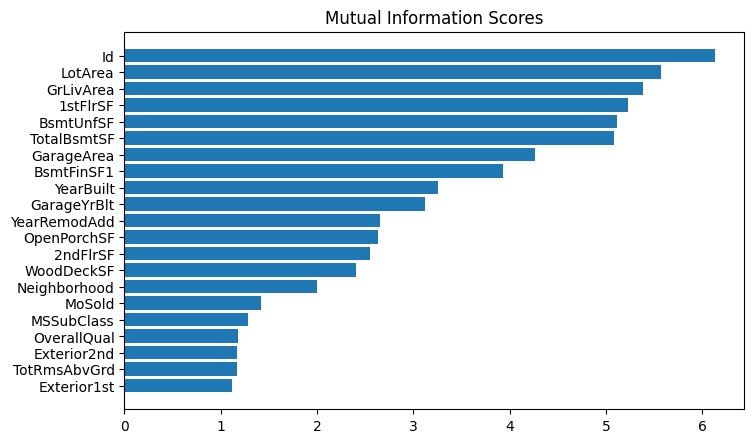

In [38]:
plt.figure(dpi=100, figsize=(8, 5))

plot_mi_scores(mi_scores.head(21))

In [39]:
"""
At this point, we could either take a closer look at these categories and try and find more precise relations between them.
In particular, we should see if any other features with low MIs have some significant interactions with some of these high
MI features. We could also try and create new features that would better fit what we're trying to predict. However, for now, 
we will simply take the first 20 features with the highest MI scores (not inc. the ID) and see what this does for us.
"""

train2.pop("Id")
y = train2.pop("SalePrice")

In [40]:
train2.shape

(1460, 75)

In [41]:
y.shape

(1460,)

In [42]:
train2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [43]:
features = ["LotArea", "GrLivArea", "1stFlrSF", "BsmtUnfSF", "TotalBsmtSF", "GarageArea", "BsmtFinSF1", "YearBuilt", "GarageYrBlt", "YearRemodAdd", "OpenPorchSF", "2ndFlrSF", "WoodDeckSF", "Neighborhood", "MoSold", "MSSubClass", "OverallQual", "Exterior2nd", "TotRmsAbvGrd", "Exterior1st"]

X = train2[features]

In [44]:
X.shape

(1460, 20)

In [45]:
X.head()

,LotArea,GrLivArea,1stFlrSF,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF1,YearBuilt,GarageYrBlt,YearRemodAdd,OpenPorchSF,2ndFlrSF,WoodDeckSF,Neighborhood,MoSold,MSSubClass,OverallQual,Exterior2nd,TotRmsAbvGrd,Exterior1st
0,8450,1710,856,150,856,548,706,2003,2003.0,2003,61,854,0,CollgCr,2,60,7,VinylSd,8,VinylSd
1,9600,1262,1262,284,1262,460,978,1976,1976.0,1976,0,0,298,Veenker,5,20,6,MetalSd,6,MetalSd
2,11250,1786,920,434,920,608,486,2001,2001.0,2002,42,866,0,CollgCr,9,60,7,VinylSd,6,VinylSd
3,9550,1717,961,540,756,642,216,1915,1998.0,1970,35,756,0,Crawfor,2,70,7,Wd Shng,7,Wd Sdng
4,14260,2198,1145,490,1145,836,655,2000,2000.0,2000,84,1053,192,NoRidge,12,60,8,VinylSd,9,VinylSd


In [46]:
X.describe()

,LotArea,GrLivArea,1stFlrSF,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF1,YearBuilt,YearRemodAdd,OpenPorchSF,2ndFlrSF,WoodDeckSF,MoSold,MSSubClass,OverallQual,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1162.626712,567.240411,1057.429452,472.980137,443.639726,1971.267808,1984.865753,46.660274,346.992466,94.244521,6.321918,56.897260,6.099315,6.517808
std,9981.264932,525.480383,386.587738,441.866955,438.705324,213.804841,456.098091,30.202904,20.645407,66.256028,436.528436,125.338794,2.703626,42.300571,1.382997,1.625393
min,1300.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,2.000000
25%,7553.500000,1129.500000,882.000000,223.000000,795.750000,334.500000,0.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,5.000000,20.000000,5.000000,5.000000
50%,9478.500000,1464.000000,1087.000000,477.500000,991.500000,480.000000,383.500000,1973.000000,1994.000000,25.000000,0.000000,0.000000,6.000000,50.000000,6.000000,6.000000
75%,11601.500000,1776.750000,1391.250000,808.000000,1298.250000,576.000000,712.250000,2000.000000,2004.000000,68.000000,728.000000,168.000000,8.000000,70.000000,7.000000,7.000000
max,215245.000000,5642.000000,4692.000000,2336.000000,6110.000000,1418.000000,5644.000000,2010.000000,2010.000000,547.000000,2065.000000,857.000000,12.000000,190.000000,10.000000,14.000000


In [47]:
#Turn all categorical data into integers
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#Now we need to decide which models to use. To start with we'll just use a random forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error #don't need this

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [49]:
#Now get the test data and predict. Need to format the tes : 
test_file_path = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"
test = pd.read_csv(test_file_path)

In [50]:
test.shape

(1459, 80)

In [51]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [52]:
sample_path = "/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv"
sample = pd.read_csv(sample_path)

In [53]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [54]:
"""We need to check the data to see if there are missing values. These may be in different columns to what we had for 
the training data. We also need to remove the columns that we removed for the training data since our model is trained 
only for specific input variables. 
"""

missing_count_test = test.isnull().sum()

for i in range(0, len(missing_count_test)):
    if missing_count_test[i]!=0:
        print(missing_count_test.index[i], missing_count_test[i])

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [55]:
test2 = test.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1)

print(features) 
#since we only need to focus on these, let's just remove all other columns

X_test = test2[features]

['LotArea', 'GrLivArea', '1stFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'Neighborhood', 'MoSold', 'MSSubClass', 'OverallQual', 'Exterior2nd', 'TotRmsAbvGrd', 'Exterior1st']


In [56]:
missing_count_X_test = X_test.isnull().sum()

for i in range(0, len(missing_count_X_test)):
    if missing_count_X_test[i]!=0:
        print(missing_count_X_test.index[i], missing_count_X_test[i])

BsmtUnfSF 1
TotalBsmtSF 1
GarageArea 1
BsmtFinSF1 1
GarageYrBlt 78
Exterior2nd 1
Exterior1st 1


In [57]:
X_test.BsmtUnfSF.value_counts()

0.0       123
384.0      11
624.0       8
738.0       7
100.0       7
         ... 
36.0        1
892.0       1
747.0       1
1216.0      1
1503.0      1
Name: BsmtUnfSF, Length: 793, dtype: int64

In [58]:
X_test.BsmtUnfSF = X_test.BsmtUnfSF.fillna(X_test.BsmtUnfSF.mean())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [59]:
X_test.BsmtUnfSF.isnull().sum()

0

In [60]:
X_test.TotalBsmtSF.value_counts()

X_test.TotalBsmtSF = X_test.TotalBsmtSF.fillna(X_test.TotalBsmtSF.mean())
X_test.GarageArea = X_test.GarageArea.fillna(X_test.GarageArea.mean())
X_test.BsmtFinSF1 = X_test.BsmtFinSF1.fillna(X_test.BsmtFinSF1.mean())

#replace the missing value for the next two with the mode, since these are categorical. The [0] is needed because mode returns a series.
X_test.Exterior1st = X_test.Exterior1st.fillna(X_test.Exterior1st.mode()[0])
X_test.Exterior2nd = X_test.Exterior2nd.fillna(X_test.Exterior2nd.mode()[0])

In [61]:
missing_count_X_test = X_test.isnull().sum()

for i in range(0, len(missing_count_X_test)):
    if missing_count_X_test[i]!=0:
        print(missing_count_X_test.index[i], missing_count_X_test[i])

GarageYrBlt 78


In [62]:
X_test.GarageYrBlt = X_test.GarageYrBlt.fillna("NA")

missing_count_X_test = X_test.isnull().sum()

for i in range(0, len(missing_count_X_test)):
    if missing_count_X_test[i]!=0:
        print(missing_count_X_test.index[i], missing_count_X_test[i])

#Now we should be ready to make predictions...

In [63]:
#encode categorical variables:

for colname in X_test.select_dtypes("object"):
    X_test[colname], _ = X_test[colname].factorize()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
preds = forest_model.predict(X_test)

In [65]:
preds

array([128947.66, 165774.5 , 188367.64, ..., 160973.18, 115134.  ,
       228297.18])

In [66]:
test_id = np.array(test.Id)

In [67]:
frame = { 'Id': test_id, 'SalePrice': preds }
  
first_submission = pd.DataFrame(frame)

In [68]:
first_submission.head()

,Id,SalePrice
0,1461,128947.66
1,1462,165774.50
2,1463,188367.64
3,1464,193227.85
4,1465,204012.10


In [69]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [70]:
first_submission.to_csv('sub1.csv', index=False)

#Rank at time of submission: 3525/5382, error = 0.15524
#To improve, should spend more time on feature engineering, maybe think more carefully about how missing values are filled in.
#Try creating new features, look at more metrics to help with this, use more graphs to visualise which features are useful and which
#features interact with each other. 
#Easy thing to try would be to use different models such as XGBoost or a Neural Network. 

In [71]:
#ATTEMPT 2: XGBoost

from xgboost import XGBRegressor

my_model_2 = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model_2.fit(X, y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
preds2 = my_model_2.predict(X_test)

In [73]:
frame2 = { 'Id': test_id, 'SalePrice': preds2 }
  
second_submission = pd.DataFrame(frame2)

second_submission.to_csv('sub2.csv', index=False)

"""
error = 0.16480, worse than the random forest model. 
"""

'\nerror = 0.16480, worse than the random forest model. \n'

In [74]:
#ATTEMPT 3: XGBoost with n_estimators=1000, learning_rate=0.05, early_stopping_rounds=5

my_model_3 = XGBRegressor(n_estimators = 1000, learning_rate=0.05)

my_model_3.fit(X, y, early_stopping_rounds=5, eval_set=[(X, y)], verbose=False)

preds3 = my_model_3.predict(X_test)

frame3 = { 'Id': test_id, 'SalePrice': preds3 }
  
submission3 = pd.DataFrame(frame3)

submission3.to_csv('sub3.csv', index=False)

"""
error = 0.15476, best so far, but only slightly better than random forest model. 
"""


'\nerror = 0.15476, best so far, but only slightly better than random forest model. \n'

In [75]:
#ATTEMPT 4: Ridge regression (i.e. regularised least squares)

from sklearn import linear_model
my_model_4 = linear_model.Ridge(alpha=.5) #alphs is the regularisation/penalisation parameter.
my_model_4.fit(X,y)

preds4 = my_model_4.predict(X_test)

frame4 = { 'Id': test_id, 'SalePrice': preds4 }
  
submission4 = pd.DataFrame(frame4)

submission4.to_csv('sub4.csv', index=False)

"""
error = 0.59955, much worse than tree-based models above. Ma
"""

'\nerror = 0.59955, much worse than tree-based models above. Ma\n'

In [76]:
#Let's try to preprocess the input data better before we train the model. We'll use a built-in feature selection tool. 

X_full = train2.copy() #This is the full dataset we started with (with some columns removed and missing values replaced).

for colname in X_full.select_dtypes("object"):
    X_full[colname], _ = X_full[colname].factorize()

In [77]:
X_full.shape

(1460, 75)

In [78]:
X.shape

(1460, 20)

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_full, y)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_full)

In [80]:
X_new.shape

(1460, 35)

In [81]:
model.get_support()

array([ True, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False])

In [82]:
a=(X_full.columns * model.get_support()).tolist()
clf_features = []
for col in a:
    if len(col)!=0:
        clf_features.append(col)
print(clf_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']


In [83]:
X2 = X_full[clf_features]

In [84]:
#Now we have the new input preprocessed input data, but we need to do the same to the test data. First, we will replace
#all missing values from the full test data frame. We start with test2, which is the test data with the columns removed
#that had most values missing. 

test2copy = test2.copy()

for colname in test2copy.select_dtypes("object"):
    test2copy[colname], _ = test2copy[colname].factorize()
    
missing_test2copy = test2copy.isnull().sum()

for i in range(0, len(missing_test2copy)):
    if missing_test2copy[i]!=0:
        print(missing_test2copy.index[i], missing_test2copy[i])

LotFrontage 227
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 78
GarageCars 1
GarageArea 1


In [85]:
test2copy.BsmtUnfSF = test2copy.BsmtUnfSF.fillna(test2copy.BsmtUnfSF.mean())
test2copy.TotalBsmtSF =test2copy.TotalBsmtSF.fillna(test2copy.TotalBsmtSF.mean())
test2copy.GarageArea = test2copy.GarageArea.fillna(test2copy.GarageArea.mean())
test2copy.BsmtFinSF1 = test2copy.BsmtFinSF1.fillna(test2copy.BsmtFinSF1.mean())
test2copy.GarageYrBlt = test2copy.GarageYrBlt.fillna("NA")

In [86]:
missing_test2copy = test2copy.isnull().sum()

for i in range(0, len(missing_test2copy)):
    if missing_test2copy[i]!=0:
        print(missing_test2copy.index[i], missing_test2copy[i])

LotFrontage 227
MasVnrArea 15
BsmtFinSF2 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1


In [87]:
test2copy.LotFrontage = test2copy.LotFrontage.fillna(test2copy.LotFrontage.mean())
test2copy.MasVnrArea = test2copy.MasVnrArea.fillna(test2copy.MasVnrArea.mean())
test2copy.BsmtFinSF2 = test2copy.BsmtFinSF2.fillna(test2copy.BsmtFinSF2.mean())
test2copy.BsmtFullBath = test2copy.BsmtFullBath.fillna(test2copy.BsmtFullBath.mode()[0])
test2copy.BsmtHalfBath = test2copy.BsmtHalfBath.fillna(test2copy.BsmtHalfBath.mode()[0])
test2copy.GarageCars = test2copy.GarageCars.fillna(test2copy.GarageCars.mode()[0])

In [88]:
for colname in test2copy.select_dtypes("object"):
    test2copy[colname], _ = test2copy[colname].factorize()

test_full = test2copy 
#This is now the full data set with missing values replaces and appropriate columns removed. This is 
#what we will start with from now on when we create any new preprocessing structure. 

In [89]:
test_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,0,0,0,0,0,...,0,0,0,120,0,0,6,2010,0,0
1,1462,20,1,81.0,14267,0,1,0,0,1,...,36,0,0,0,0,12500,6,2010,0,0
2,1463,60,1,74.0,13830,0,1,0,0,0,...,34,0,0,0,0,0,3,2010,0,0
3,1464,60,1,78.0,9978,0,1,0,0,0,...,36,0,0,0,0,0,6,2010,0,0
4,1465,120,1,43.0,5005,0,1,1,0,0,...,82,0,0,144,0,0,1,2010,0,0


In [90]:
test_full.shape

(1459, 76)

In [91]:
#Now we can fit the model as usual. We will use the XGBoost that gave the best performance before. 

X_test_2 = test_full[clf_features]

In [92]:
#ATTEMPT 5: XGBoost with SelectFromModel feature selector (tree classifier)


my_model_5 = XGBRegressor(n_estimators = 1000, learning_rate=0.05)

my_model_5.fit(X2, y, early_stopping_rounds=5, eval_set=[(X2, y)], verbose=False)

preds5 = my_model_5.predict(X_test_2)

frame5 = { 'Id': test_id, 'SalePrice': preds5 }
  
submission5 = pd.DataFrame(frame5)

submission5.to_csv('sub5.csv', index=False)

"""
error = 0.1491, best so far.
"""

'\nerror = 0.1491, best so far.\n'

In [93]:
#ATTEMPT 6: Same as 5, but now we use separate parts of the data for training and validation to see if there is a problem with overfitting.

my_model_6 = XGBRegressor(n_estimators = 1000, learning_rate=0.05)

my_model_6.fit(X2[0:1001], y[0:1001], early_stopping_rounds=5, eval_set=[(X2[1001:1460], y[1001:1460])], verbose=False)

preds6 = my_model_6.predict(X_test_2)

frame6 = { 'Id': test_id, 'SalePrice': preds6 }
  
submission6 = pd.DataFrame(frame6)


"""
error = 0.15014, slightly worse than 5, so there doesn't seem to be any issue with overfitting. 
"""

submission6.to_csv('sub6.csv', index=False)

In [94]:
"""
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
"""

discrete_features_2 = X2.dtypes == int

mi_scores_2 = make_mi_scores(X2, y, discrete_features_2)
print(mi_scores_2)

LotArea         5.576921
GrLivArea       5.385650
1stFlrSF        5.228554
BsmtUnfSF       5.118456
TotalBsmtSF     5.081468
GarageArea      4.263250
BsmtFinSF1      3.930450
YearBuilt       3.253142
GarageYrBlt     3.116733
YearRemodAdd    2.655247
OpenPorchSF     2.634046
2ndFlrSF        2.545305
WoodDeckSF      2.407726
Neighborhood    2.003888
MoSold          1.422846
MSSubClass      1.281812
OverallQual     1.175989
Exterior2nd     1.172542
TotRmsAbvGrd    1.166100
Exterior1st     1.116941
BsmtFinType1    0.961786
YrSold          0.847030
FireplaceQu     0.752668
GarageFinish    0.752268
OverallCond     0.742182
BedroomAbvGr    0.685355
BsmtExposure    0.666649
HeatingQC       0.603568
MasVnrType      0.558353
Fireplaces      0.543726
LotConfig       0.472501
LotShape        0.446402
BsmtFullBath    0.354872
LotFrontage     0.171262
MasVnrArea      0.101323
Name: MI Scores, dtype: float64


"\nSeem to be some outliers here, and most of the houses seem to have similar LotArea, so maybe this isn't a very useful feature \nto have? There does seem to be a fairly clear relation between GrLivArea and OverallQual though.\n"

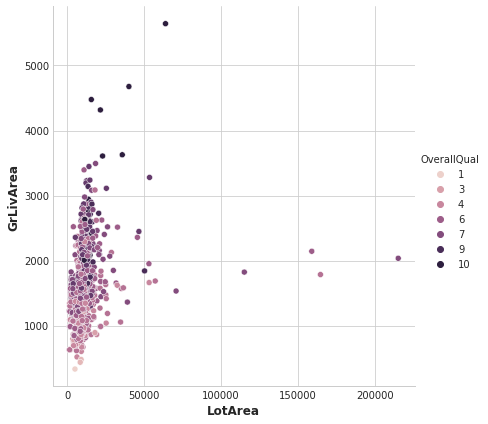

In [95]:
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


sns.relplot(
    x="LotArea", y="GrLivArea", hue="OverallQual", data=X2, height=6,
)
"""
Seem to be some outliers here, and most of the houses seem to have similar LotArea, so maybe this isn't a very useful feature 
to have? There does seem to be a fairly clear relation between GrLivArea and OverallQual though.
"""

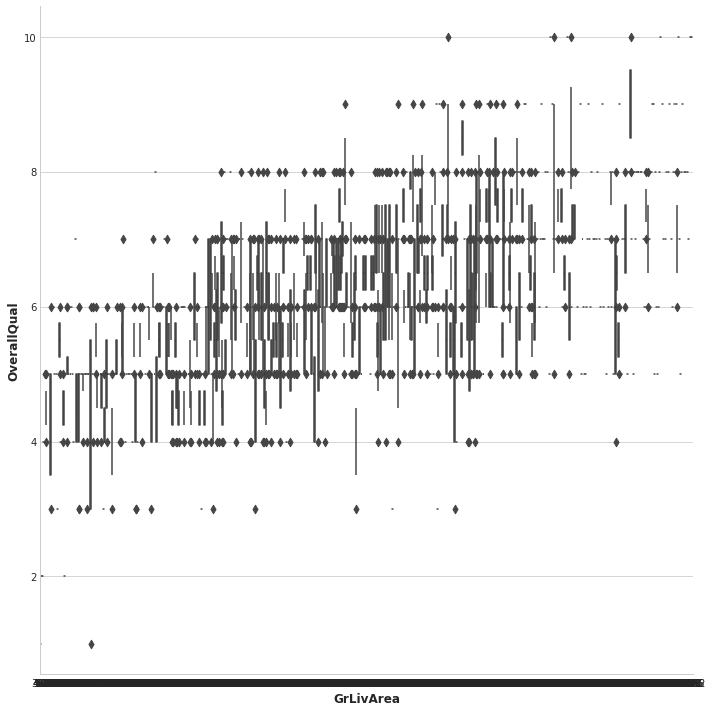

In [96]:
sns.catplot(x="GrLivArea", y="OverallQual", data=X2, kind="boxen", height=10)

#Weird looking, but there does at least seem to be a general upwards diagonal trend, as hoped. 

In [97]:
submission5.to_csv('sub5.csv', index=False)